## Beer Analysis
---

Notebook to get insights from the dataset for beers, breweries and reviews.

The dataset came in 3 different CSV files: beers.csv, breweries.csv and reviews.csv that has around 9 Million reviews!

#### Data Source: [Kaggle](https://www.kaggle.com/ehallmar/beers-breweries-and-beer-reviews#reviews.csv)

The data comes from [BeerAdvocate](https://www.beeradvocate.com)

In [1]:
# Dependencies and packages
%reload_ext lab_black

import os
import pandas as pd
import numpy as np
import math as math
import datetime as dt
import plotly
import plotly.express as px

In [2]:
csv_path = os.path.join("../data/csv/beers.csv")
df_beers = pd.read_csv(csv_path)

df_beers.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f


In [3]:
df_beers = df_beers.drop(["notes"], axis=1)
df_beers.head()

,id,name,brewery_id,state,country,style,availability,abv,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,f


In [4]:
csv_path2 = os.path.join("../data/csv/breweries.csv")
df_breweries = pd.read_csv(csv_path2)

df_breweries.head()

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"


In [5]:
df_breweries = df_breweries.drop(["notes"], axis=1)
df_breweries.head()

,id,name,city,state,country,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,"Bar, Eatery"


In [6]:
csv_path3 = os.path.join("../data/csv/reviews.csv")
df_reviews = pd.read_csv(csv_path3)

In [7]:
df_reviews.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


In [10]:
print(df_beers.shape)
print(df_breweries.shape)
print(df_reviews.shape)

(358873, 9)
(50347, 6)
(9073128, 10)


In [11]:
# Find the number of unique beers in reviews.csv
df_reviews["beer_id"].value_counts()

11757     17160
2093      15947
7971      14927
1093      14915
29619     14292
          ...  
203777        1
126326        1
109950        1
282050        1
8188          1
Name: beer_id, Length: 309542, dtype: int64

In [12]:
# Find unique users who reviewed
df_reviews["username"].value_counts()

Sammy             13798
kylehay2004       12221
acurtis           12016
StonedTrippin     11859
jaydoc            11800
                  ...  
Bobby60045            1
Scarpachie            1
Bartender_Coop        1
johnnycakes           1
pictor                1
Name: username, Length: 164934, dtype: int64

In [13]:
# Find unique value counts for every column in beers.csv
df_beers.apply(lambda x: x.isnull().value_counts())

,id,name,brewery_id,state,country,style,availability,abv,retired
False,358873.0,358873.0,358873.0,298147,358719,358872,358873.0,320076,358873.0
True,NaN,NaN,NaN,60726,154,1,NaN,38797,NaN


In [14]:
# Find value counts for every column in breweries.csv
df_breweries.apply(lambda x: x.isnull().value_counts())

,id,name,city,state,country,types
False,50347.0,50347.0,50289,39076,50341,50347.0
True,NaN,NaN,58,11271,6,NaN


In [15]:
# Find value counts for every column in reviews.csv
df_reviews.apply(lambda x: x.isnull().value_counts())

,beer_id,username,date,text,look,smell,taste,feel,overall,score
False,9073128.0,9069313,9073128.0,9073128.0,5283110,5283110,5283110,5283110,5283110,9073128.0
True,NaN,3815,NaN,NaN,3790018,3790018,3790018,3790018,3790018,NaN


### Number of Breweries per Country

In [16]:
df_breweries["country"].value_counts()

US    34693
GB     2525
CA     1890
DE     1812
BE      756
      ...  
BD        1
AF        1
HT        1
LS        1
YT        1
Name: country, Length: 199, dtype: int64

In [17]:
# Number of unique countries
df_breweries["country"].nunique()

199

**Next Steps:**
- Drop all the reviews that are below 4 and store in another DF

- Drop column `'text'` - we dont need detailed review of the user.

- Drop columns `look`, `smell`, `taste`, `feel` and `overall`

In [11]:
# df_reviews2 is just a more cleaned up DF for the recommender app
df_reviews2 = df_reviews.copy()

In [12]:
# Only keep the reviews higher than 4
df_reviews2.drop(df_reviews2[df_reviews2["score"] < 4].index, inplace=True)

In [13]:
df_reviews2.shape

(4785625, 10)

In [14]:
# remove the unwanted text column
df_reviews2 = df_reviews2.drop(["text"], axis=1)

In [15]:
# remove the reviews and reviewed beers than had less than 10 reviews
# df_reviews2.groupby("beer_id").filter(lambda x: len(x) > 10)
df_reviews2 = df_reviews2[
    df_reviews2.groupby("beer_id").beer_id.transform("count") > 10
].copy()
df_reviews2.head()

,beer_id,username,date,look,smell,taste,feel,overall,score
1,125646,_dirty_,2017-12-21,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,4.25,4.50,4.25,4.25,4.25,4.31
5,125646,jneff33,2017-12-20,4.50,4.75,5.00,5.00,5.00,4.91


In [16]:
df_reviews2["beer_id"].value_counts()

11757     16119
7971      14432
16814     13927
2093      13409
29619     12814
          ...  
313143       11
47012        11
96152        11
286845       11
4098         11
Name: beer_id, Length: 35593, dtype: int64

In [35]:
df_reviews2 = df_reviews2.drop(["look", "smell", "taste", "feel", "overall"], axis=1)

In [36]:
df_reviews2 = df_reviews2.drop(["date", "username"], axis=1)

In [37]:
df_reviews2

,beer_id,score
1,125646,4.50
2,125646,4.75
3,125646,4.58
4,125646,4.31
5,125646,4.91
...,...,...
9073123,104824,4.00
9073124,104824,5.00
9073125,104824,5.00
9073126,104824,4.50


In [38]:
df_reviews2.to_csv(os.path.join("../data/csv/clean_reviews.csv"))

In [27]:
state_counts = pd.DataFrame(
    df_breweries["state"].value_counts().rename_axis("state").reset_index(name="counts")
)

In [28]:
state_counts.head(5)

,state,counts
0,CA,3638
1,PA,2454
2,NY,2284
3,GB2,2152
4,FL,1595


In [29]:
df_beers["style"].value_counts()

American IPA                       44719
American Pale Ale (APA)            22159
American Imperial IPA              18338
Belgian Saison                     18167
American Wild Ale                  12972
                                   ...  
Japanese Happoshu                    123
Finnish Sahti                        123
Bière de Champagne / Bière Brut      116
Belgian Faro                          32
Wild/Sour Beers                        4
Name: style, Length: 112, dtype: int64

### Read BA Beerstyles csv file

In [20]:
csv_path4 = os.path.join("../data/csv/ba_beerstyles.csv")
df_beerstyles = pd.read_csv(csv_path4)

df_beerstyles.head()

,Style,Category,ABV (min),ABV (max),ABV (avg),IBU (min),IBU (max),IBU (avg),SRM (min),SRM (max),Glassware,Description
0,German Bock,Bock,6.3,7.6,6.95,20,30,25.0,20,30,Tulip,Bock is a bottom fermenting lager that general...
1,German Doppelbock,Bock,6.6,7.9,7.25,17,27,22.0,12,30,Tulip,"“Doppel” meaning “double,” this style is a big..."
2,German Eisbock,Bock,7.0,14.0,10.50,25,35,30.0,12,30,Snifter,Eisbock is an extremely strong beer with a typ...
3,German Maibock,Bock,6.3,8.1,7.20,20,38,29.0,4,9,Goblet,Also called “Heller Bock” (meaning “Pale Bock”...
4,German Weizenbock,Bock,7.0,9.5,8.25,15,35,25.0,4,30,Tulip,The German-style Weizenbock is a wheat version...


In [21]:
df_beerstyles.nunique()

Style          111
Category        14
ABV (min)       29
ABV (max)       36
ABV (avg)       53
IBU (min)       21
IBU (max)       25
IBU (avg)       35
SRM (min)       16
SRM (max)       18
Glassware        9
Description    111
dtype: int64

In [32]:
df_beers.nunique()

id              358873
name            298567
brewery_id       16569
state               67
country            193
style              112
availability        20
abv                939
retired              2
dtype: int64

In [33]:
df_breweries.nunique()

id         50347
name       45245
city       11664
state         67
country      199
types         30
dtype: int64

In [34]:
df_breweries["types"].value_counts()

Bar, Eatery                                   13573
Store                                          9726
Brewery                                        8005
Brewery, Bar, Eatery                           2801
Bar, Eatery, Beer-to-go                        2789
Brewery, Bar, Beer-to-go                       2670
Bar                                            2466
Brewery, Bar, Eatery, Beer-to-go               2370
Brewery, Bar                                   1360
Bar, Beer-to-go                                1258
Homebrew                                        806
Brewery, Beer-to-go                             755
Brewery, Eatery                                 671
Eatery, Beer-to-go                              272
Homebrew, Beer-to-go                            224
Eatery                                          186
Brewery, Eatery, Beer-to-go                      93
Bar, Homebrew, Beer-to-go                        61
Brewery, Bar, Homebrew, Beer-to-go               52
Brewery, Bar

In [23]:
us_breweries = df_breweries[df_breweries["country"] == "US"]
us_breweries.head()

,id,name,city,state,country,types
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,Store
5,31561,Teddy's Tavern,Seattle,WA,US,"Bar, Beer-to-go"
9,41278,The Other End,Destin,FL,US,"Bar, Eatery"


In [24]:
us_breweries.nunique()

id         34693
name       30185
city        4958
state         51
country        1
types         30
dtype: int64

In [25]:
brewery_only = us_breweries[us_breweries["types"] == "Brewery"]
brewery_only.head()

,id,name,city,state,country,types
18,31986,Power Marketing / Wicked Pissa,Westport,MA,US,Brewery
20,8590,Wet Planet Beverage Co.,Utica,NY,US,Brewery
81,28724,Lewis Beer Company,Temecula,CA,US,Brewery
85,30278,New Ulm Brewing & Beverage Company,Sleepy Eye,MN,US,Brewery
115,32066,Pacific Breach,Pearl City,HI,US,Brewery


In [26]:
brewery_only.nunique()

id         1376
name       1369
city        826
state        51
country       1
types         1
dtype: int64

In [27]:
# filter out breweries that fall under type "brewery" and drop all other like "eatery, bars etc"
us_breweries = us_breweries[us_breweries["types"].str.contains("Brewery")]
us_breweries.head()

,id,name,city,state,country,types
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,"Brewery, Bar, Beer-to-go"
18,31986,Power Marketing / Wicked Pissa,Westport,MA,US,Brewery
20,8590,Wet Planet Beverage Co.,Utica,NY,US,Brewery
23,53919,Amity Ales Brewpub and Eatery,Amityville,NY,US,"Brewery, Bar, Eatery"
27,48475,Springdale Barrel Room,Framingham,MA,US,"Brewery, Bar"


In [28]:
us_breweries.to_csv(os.path.join("../data/csv/usa_breweries.csv"))

In [41]:
us_state = pd.DataFrame(
    us_breweries["state"].value_counts().rename_axis("state").reset_index(name="counts")
)

In [42]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers
pio.renderers.default = "jupyterlab"

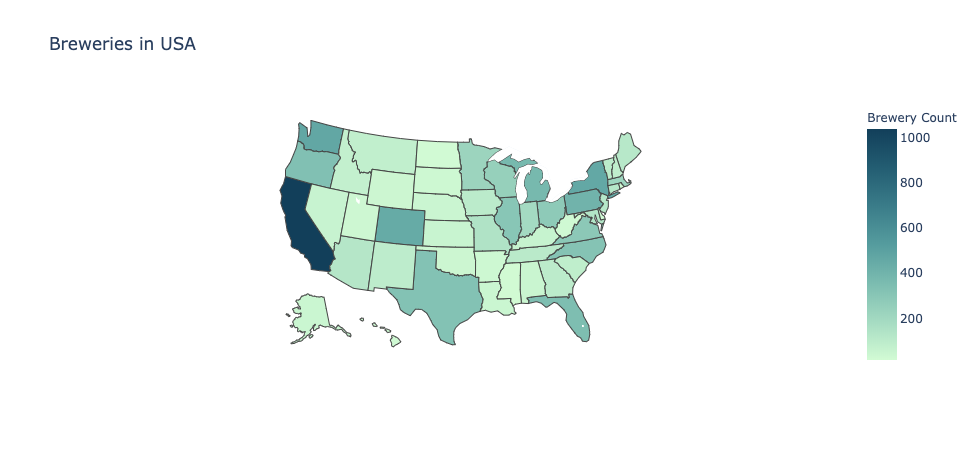

In [43]:
fig = go.Figure(
    data=go.Choropleth(
        locations=us_state["state"],  # Spatial coordinates
        z=us_state["counts"].astype(float),  # Data to be color-coded
        locationmode="USA-states",  # set of locations match entries in `locations`
        colorscale="Darkmint",
        colorbar_title="Brewery Count",
    )
)

fig.update_layout(
    title_text="Breweries in USA", geo_scope="usa",  # limite map scope to USA
)

fig.show()

In [44]:
us_breweries["types"].value_counts()

Brewery, Bar, Beer-to-go                      2267
Brewery, Bar, Eatery, Beer-to-go              1752
Brewery, Bar, Eatery                          1549
Brewery                                       1376
Brewery, Bar                                   981
Brewery, Eatery                                275
Brewery, Beer-to-go                            256
Brewery, Eatery, Beer-to-go                     42
Brewery, Bar, Homebrew, Beer-to-go              40
Brewery, Bar, Eatery, Homebrew, Beer-to-go      29
Brewery, Bar, Homebrew                          26
Brewery, Bar, Eatery, Homebrew                  18
Brewery, Homebrew                               10
Brewery, Homebrew, Beer-to-go                    7
Brewery, Eatery, Homebrew, Beer-to-go            1
Brewery, Eatery, Homebrew                        1
Name: types, dtype: int64

In [29]:
df_breweries = df_breweries[df_breweries["types"].str.contains("Brewery")]
df_breweries.head()

,id,name,city,state,country,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,"Brewery, Bar, Beer-to-go"
6,35975,Modus Operandi Brewing Co.,Mona Vale,NaN,AU,"Brewery, Bar, Eatery, Beer-to-go"
7,5618,Hops! Beer Restaurant & Pizza,Riccione (RN),NaN,IT,"Brewery, Bar, Eatery"
13,16995,"Le Bien, Le Malt",Rimouski,QC,CA,"Brewery, Bar, Eatery"


In [30]:
clean_breweries = df_breweries.rename(columns={"id": "brewery_id"})

In [31]:
clean_breweries.to_csv(os.path.join("../data/csv/clean_breweries.csv"))

In [32]:
clean_beers = df_beers.rename(columns={"id": "beer_id"})

In [40]:
clean_beers = clean_beers.drop(["retired"], axis=1)

In [41]:
clean_beers.to_csv(os.path.join("../data/csv/clean_beers.csv"))

In [42]:
clean_breweries

,brewery_id,name,city,state,country,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,"Brewery, Bar, Beer-to-go"
6,35975,Modus Operandi Brewing Co.,Mona Vale,NaN,AU,"Brewery, Bar, Eatery, Beer-to-go"
7,5618,Hops! Beer Restaurant & Pizza,Riccione (RN),NaN,IT,"Brewery, Bar, Eatery"
13,16995,"Le Bien, Le Malt",Rimouski,QC,CA,"Brewery, Bar, Eatery"
...,...,...,...,...,...,...
50337,10186,Blackpool Brewery,"Blackpool, Lancs",GB2,GB,Brewery
50339,30980,Zipline Brewing Co,Lincoln,NE,US,"Brewery, Bar, Beer-to-go"
50340,23055,Banff Ave. Brewing Co.,Banff,AB,CA,"Brewery, Bar, Eatery, Beer-to-go"
50342,1430,Blagodarnensky Brewery,Blagodarny,NaN,RU,Brewery


### 

### Merge Dataframes

In [45]:
df_merge1 = pd.merge(
    clean_beers, clean_breweries, left_on="brewery_id", right_on="brewery_id"
)
df_merge1.head(5)

,beer_id,name_x,brewery_id,state_x,country_x,style,availability,abv,name_y,city,state_y,country_y,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,Main Street Brewery,Pleasanton,CA,US,"Brewery, Bar, Eatery"
1,8677,Red Leaf Strong Ale,2199,CA,US,American Strong Ale,Year-round,8.6,Main Street Brewery,Pleasanton,CA,US,"Brewery, Bar, Eatery"
2,8129,Hefeweisen,2199,CA,US,German Hefeweizen,Year-round,NaN,Main Street Brewery,Pleasanton,CA,US,"Brewery, Bar, Eatery"
3,202536,Bikini Bottom,2199,CA,US,American Lager,Rotating,4.9,Main Street Brewery,Pleasanton,CA,US,"Brewery, Bar, Eatery"
4,33121,Fog Lifter IPA,2199,CA,US,American IPA,Rotating,NaN,Main Street Brewery,Pleasanton,CA,US,"Brewery, Bar, Eatery"


In [46]:
df_merge1 = df_merge1.rename(
    columns={
        "name_x": "beer_name",
        "style": "beer_style",
        "state_x": "state",
        "country_x": "country",
    }
)

In [48]:
df_merge1 = df_merge1.rename(columns={"name_y": "brewery_name"}).drop(
    ["state_y", "country_y"], axis=1
)

In [49]:
df_merge1

,beer_id,beer_name,brewery_id,state,country,beer_style,availability,abv,brewery_name,city,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,Main Street Brewery,Pleasanton,"Brewery, Bar, Eatery"
1,8677,Red Leaf Strong Ale,2199,CA,US,American Strong Ale,Year-round,8.6,Main Street Brewery,Pleasanton,"Brewery, Bar, Eatery"
2,8129,Hefeweisen,2199,CA,US,German Hefeweizen,Year-round,NaN,Main Street Brewery,Pleasanton,"Brewery, Bar, Eatery"
3,202536,Bikini Bottom,2199,CA,US,American Lager,Rotating,4.9,Main Street Brewery,Pleasanton,"Brewery, Bar, Eatery"
4,33121,Fog Lifter IPA,2199,CA,US,American IPA,Rotating,NaN,Main Street Brewery,Pleasanton,"Brewery, Bar, Eatery"
...,...,...,...,...,...,...,...,...,...,...,...
358761,167034,Vals Paterke,40028,NaN,BE,Belgian Strong Pale Ale,Year-round,8.3,Brouwerij 't Drankorgel,Mol,"Brewery, Beer-to-go"
358762,214214,Crus - Sacra Birra,44211,NaN,IT,Belgian Dubbel,Rotating,7.0,Birrificio Artigianale Opera,Pavia,Brewery
358763,200378,Caudillo India Pale Ale,43193,NaN,CL,English India Pale Ale (IPA),Year-round,8.3,Cerveza Caudillo,Santiago,Brewery
358764,289252,Hellegat Blond,49596,NaN,BE,Belgian Blonde Ale,Year-round,6.5,Brouwerij De Klem,Niel,"Brewery, Bar"


In [50]:
df_merge2 = pd.merge(df_reviews2, df_merge1, left_on="beer_id", right_on="beer_id")
df_merge2.head(5)

,beer_id,score,beer_name,brewery_id,state,country,beer_style,availability,abv,brewery_name,city,types
0,125646,4.50,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,Charlton,"Brewery, Bar, Beer-to-go"
1,125646,4.75,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,Charlton,"Brewery, Bar, Beer-to-go"
2,125646,4.58,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,Charlton,"Brewery, Bar, Beer-to-go"
3,125646,4.31,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,Charlton,"Brewery, Bar, Beer-to-go"
4,125646,4.91,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,Charlton,"Brewery, Bar, Beer-to-go"


In [54]:
# df_merge2.to_csv(os.path.join("../data/csv/final_merged_data.csv"))

In [51]:
# Find number of nulls for every column
df_merge2.apply(lambda x: x.isnull().value_counts())

,beer_id,score,beer_name,brewery_id,state,country,beer_style,availability,abv,brewery_name,city,types
False,4383363.0,4383363.0,4383363.0,4383363.0,3908748,4381425,4383363.0,4383363.0,4345162,4383363.0,4376015,4383363.0
True,NaN,NaN,NaN,NaN,474615,1938,NaN,NaN,38201,NaN,7348,NaN


In [52]:
df_merge3 = pd.merge(df_merge2, df_beerstyles, left_on="beer_style", right_on="Style")

In [53]:
df_merge3

,beer_id,score,beer_name,brewery_id,state,country,beer_style,availability,abv,brewery_name,...,ABV (min),ABV (max),ABV (avg),IBU (min),IBU (max),IBU (avg),SRM (min),SRM (max),Glassware,Description
0,125646,4.50,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
1,125646,4.75,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
2,125646,4.58,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
3,125646,4.31,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
4,125646,4.91,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830008,58111,4.00,Coedo Beniaka,3551,NaN,JP,Japanese Happoshu,Year-round,7.0,Coedo Brewery (Kyodo Shoji Koedo Brewery),...,4.0,7.0,5.5,0,0,0.0,2,7,Pilsener Glass,Happoshu is a sparkling low-malt beverage prod...
3830009,58111,4.25,Coedo Beniaka,3551,NaN,JP,Japanese Happoshu,Year-round,7.0,Coedo Brewery (Kyodo Shoji Koedo Brewery),...,4.0,7.0,5.5,0,0,0.0,2,7,Pilsener Glass,Happoshu is a sparkling low-malt beverage prod...
3830010,58111,4.50,Coedo Beniaka,3551,NaN,JP,Japanese Happoshu,Year-round,7.0,Coedo Brewery (Kyodo Shoji Koedo Brewery),...,4.0,7.0,5.5,0,0,0.0,2,7,Pilsener Glass,Happoshu is a sparkling low-malt beverage prod...
3830011,58111,4.00,Coedo Beniaka,3551,NaN,JP,Japanese Happoshu,Year-round,7.0,Coedo Brewery (Kyodo Shoji Koedo Brewery),...,4.0,7.0,5.5,0,0,0.0,2,7,Pilsener Glass,Happoshu is a sparkling low-malt beverage prod...


In [55]:
df_merge3 = df_merge3.drop(["Style"], axis=1)

In [58]:
#df_merge3 = df_merge3.rename(columns={"Style": "Category"})

In [56]:
df_merge3 = df_merge3.rename(columns={"Glassware ": "Glassware"})

In [57]:
df_merge3.head(5)

,beer_id,score,beer_name,brewery_id,state,country,beer_style,availability,abv,brewery_name,...,ABV (min),ABV (max),ABV (avg),IBU (min),IBU (max),IBU (avg),SRM (min),SRM (max),Glassware,Description
0,125646,4.50,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
1,125646,4.75,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
2,125646,4.58,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
3,125646,4.31,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
4,125646,4.91,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...


In [58]:
# Find number of nulls for every column
df_merge3.apply(lambda x: x.isnull().value_counts())

,beer_id,score,beer_name,brewery_id,state,country,beer_style,availability,abv,brewery_name,...,ABV (min),ABV (max),ABV (avg),IBU (min),IBU (max),IBU (avg),SRM (min),SRM (max),Glassware,Description
False,3830013.0,3830013.0,3830013.0,3830013.0,3475764,3828212,3830013.0,3830013.0,3794514,3830013.0,...,3830013.0,3830013.0,3830013.0,3830013.0,3830013.0,3830013.0,3830013.0,3830013.0,3830013.0,3830013.0
True,NaN,NaN,NaN,NaN,354249,1801,NaN,NaN,35499,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_merge3.count()

beer_id         3830013
score           3830013
beer_name       3830013
brewery_id      3830013
state           3475764
country         3828212
beer_style      3830013
availability    3830013
abv             3794514
brewery_name    3830013
city            3823610
types           3830013
Category        3830013
ABV (min)       3830013
ABV (max)       3830013
ABV (avg)       3830013
IBU (min)       3830013
IBU (max)       3830013
IBU (avg)       3830013
SRM (min)       3830013
SRM (max)       3830013
Glassware       3830013
Description     3830013
dtype: int64

In [62]:
# drop "username", "types"?
# df_merge3 = df_merge3[['beer_id','beer_name','beer_style','Category','score','abv','brewery_name','brewery_id','city', 'state', 'country','ABV (min)', 'ABV (max)','ABV (avg)','IBU (min)','IBU (max)', 'IBU (avg)','SRM Range','Glassware','Description','types','availability']]

In [63]:
df_merge3 = df_merge3.rename(
    columns={
        "ABV (min)": "ABV_min",
        "ABV (max)": "ABV_max",
        "ABV (avg)": "ABV_avg",
        "IBU (min)": "IBU_min",
        "IBU (max)": "IBU_max",
        "IBU (avg)": "IBU_avg",
        "SRM (min)": "SRM_min",
        "SRM (max)": "SRM_max",
    }
)

In [65]:
df_merge3.to_csv("../data/csv/final_merged_data.csv", index=False)

In [64]:
df_merge3.head(5)

,beer_id,score,beer_name,brewery_id,state,country,beer_style,availability,abv,brewery_name,...,ABV_min,ABV_max,ABV_avg,IBU_min,IBU_max,IBU_avg,SRM_min,SRM_max,Glassware,Description
0,125646,4.50,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
1,125646,4.75,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
2,125646,4.58,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
3,125646,4.31,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...
4,125646,4.91,Haze,28743,MA,US,New England IPA,Rotating,8.2,Tree House Brewing Company,...,6.3,7.5,6.9,50,70,60.0,6,15,Pint Glass,Emphasizing hop aroma and flavor without braci...


### Recommender App

In [66]:
df_merge3.sort_values(by=["score"], ascending=False)

,beer_id,score,beer_name,brewery_id,state,country,beer_style,availability,abv,brewery_name,...,ABV_min,ABV_max,ABV_avg,IBU_min,IBU_max,IBU_avg,SRM_min,SRM_max,Glassware,Description
1606118,4083,5.0,Ruination IPA,147,CA,US,American Imperial IPA,Year-round,8.2,Stone Brewing,...,7.0,12.0,9.5,65,100,82.5,6,15,Tulip,We have west coast American brewers to thank f...
3302523,5488,5.0,Wells Banana Bread Beer,664,GB2,GB,Fruit and Field Beer,Year-round,5.2,Wells & Young's Ltd,...,2.5,13.3,7.9,5,45,25.0,3,12,Tulip,"Fruit beer is made with fruit, or fruit extrac..."
793828,88407,5.0,Baudoinia,1146,IL,US,American Imperial Stout,Limited (brewed once),15.0,Goose Island Beer Co.,...,7.0,12.0,9.5,50,80,65.0,30,40,Snifter,The American-style Imperial Stout is the stron...
793826,88407,5.0,Baudoinia,1146,IL,US,American Imperial Stout,Limited (brewed once),15.0,Goose Island Beer Co.,...,7.0,12.0,9.5,50,80,65.0,30,40,Snifter,The American-style Imperial Stout is the stron...
793820,88407,5.0,Baudoinia,1146,IL,US,American Imperial Stout,Limited (brewed once),15.0,Goose Island Beer Co.,...,7.0,12.0,9.5,50,80,65.0,30,40,Snifter,The American-style Imperial Stout is the stron...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382754,72361,4.0,Duchessa,14046,NaN,IT,Belgian Saison,Year-round,5.8,Birra Del Borgo,...,4.4,8.4,6.4,20,38,29.0,3,11,Tulip,Beers in this category are gold to light amber...
2382753,72361,4.0,Duchessa,14046,NaN,IT,Belgian Saison,Year-round,5.8,Birra Del Borgo,...,4.4,8.4,6.4,20,38,29.0,3,11,Tulip,Beers in this category are gold to light amber...
2382751,72361,4.0,Duchessa,14046,NaN,IT,Belgian Saison,Year-round,5.8,Birra Del Borgo,...,4.4,8.4,6.4,20,38,29.0,3,11,Tulip,Beers in this category are gold to light amber...
2382748,72361,4.0,Duchessa,14046,NaN,IT,Belgian Saison,Year-round,5.8,Birra Del Borgo,...,4.4,8.4,6.4,20,38,29.0,3,11,Tulip,Beers in this category are gold to light amber...


In [67]:
df_merge3["beer_style"].value_counts()

American IPA               524175
American Imperial IPA      519752
American Imperial Stout    442952
American Wild Ale          196061
Russian Imperial Stout     195276
                            ...  
English Pale Mild Ale         173
Russian Kvass                 121
American Brut IPA              51
Low Alcohol Beer               35
Japanese Happoshu              12
Name: beer_style, Length: 94, dtype: int64

In [68]:
df_merge3.dtypes

beer_id           int64
score           float64
beer_name        object
brewery_id        int64
state            object
country          object
beer_style       object
availability     object
abv             float64
brewery_name     object
city             object
types            object
Category         object
ABV_min         float64
ABV_max         float64
ABV_avg         float64
IBU_min           int64
IBU_max           int64
IBU_avg         float64
SRM_min           int64
SRM_max           int64
Glassware        object
Description      object
dtype: object

In [92]:
clean_breweries["name"].count()

18944

In [95]:
df_merge3["Glassware"].value_counts()

Tulip             1836036
Snifter            841544
Pint Glass         686328
Goblet             245739
Pilsener Glass     101067
Weizen Glass        76141
Flute               32459
Stange               7067
Mug                  3632
Name: Glassware, dtype: int64